In [51]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [52]:
sample_images = "./sample_images/sample_0.jpg"

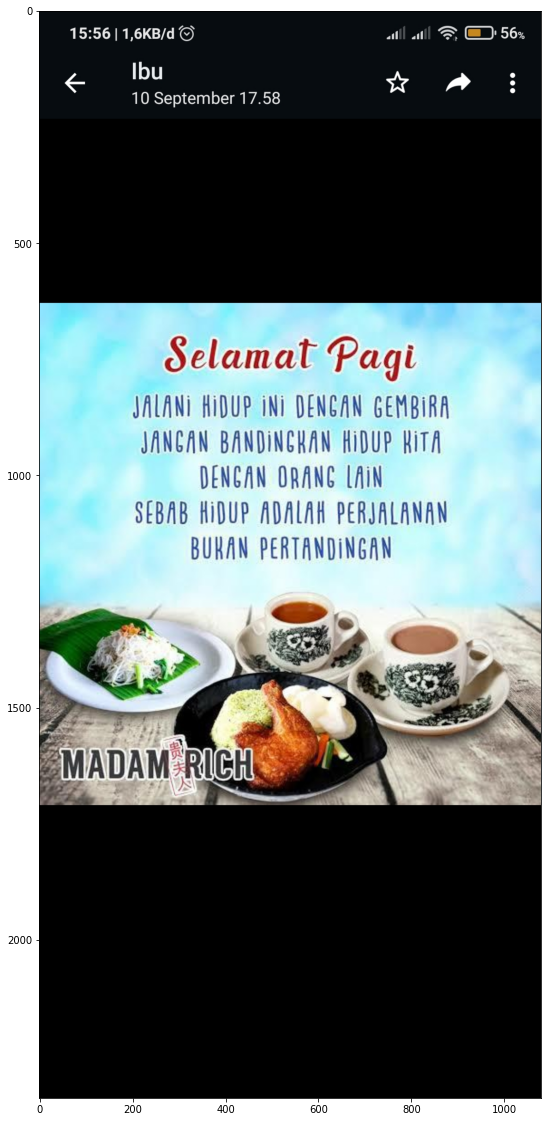

In [53]:
image_plot = np.array(Image.open(sample_images).convert("RGB"))
plt.figure(figsize=(20, 20))
plt.imshow(image_plot)

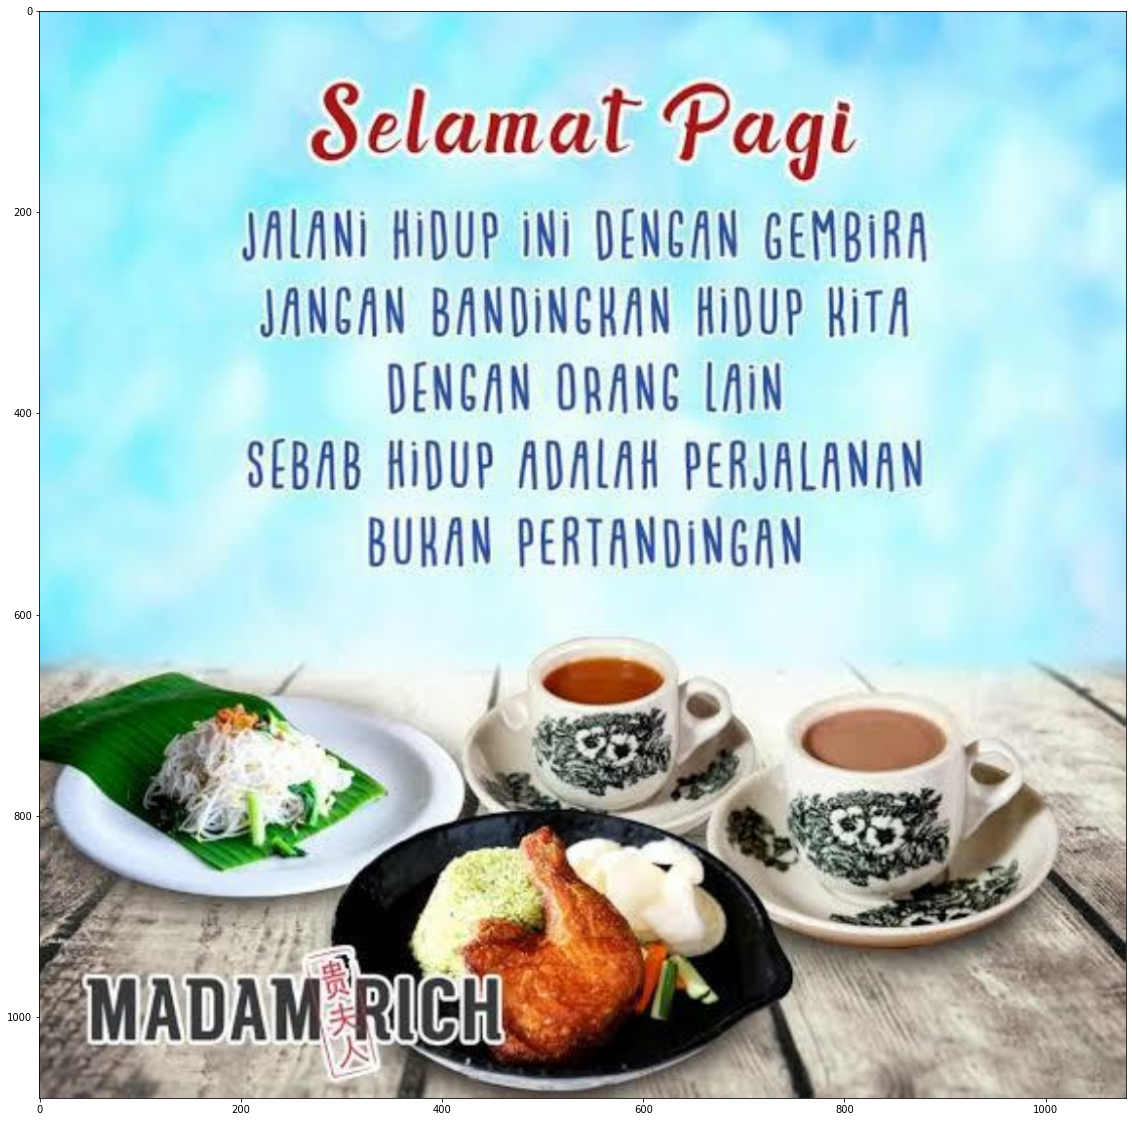

In [54]:
image = cv2.imread(sample_images)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image_gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
biggest = np.array([])
max_area = 0
for cntrs in contours:
    area = cv2.contourArea(cntrs)
    peri = cv2.arcLength(cntrs, True)
    approx = cv2.approxPolyDP(cntrs, 0.02 * peri, True)
    if area > max_area and len(approx) == 4:
        biggest = approx
        max_area = area
cnt = biggest
x, y, w, h = cv2.boundingRect(cnt)
crop = image_plot[y:y+h, x:x+w]
plt.figure(figsize=(20, 20))
plt.imshow(crop)